In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_validate
#!pip install  imbalanced-learn
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("final_office.csv")
X = df.drop(['Unnamed: 0', 'imdb_rating', 'Other_director', 'Other_writer'], axis = 1)
y = df['imdb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3]:
def tidy_scores(score_dict):
    df = pd.DataFrame(score_dict)
    df.loc['mean'] = df.mean()
    df.loc['sd'] = df.std()
    df.rename({"test_score":"val_score"}, axis=1, inplace=True)
    df.index.name = "fold"
    return df.round(2)

In [4]:
def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, Rsqr

In [5]:
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

# 1 Unscaled data

In [272]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

In [273]:
#kf = KFold(n_splits = 50, shuffle = True, random_state=42)
lpo = LeavePOut(p=2)


In [175]:
df1 = pd.read_csv("the_office.csv")
#n_words1 = df1['n_words'].values.reshape(-1, 1)
power = PowerTransformer()
n_words = power.fit_transform(n_words1)

In [191]:
dfs = pd.read_csv("final_office_scaled.csv")

In [192]:
dfs.head()

,Unnamed: 0,imdb_rating,n_directions,n_speak_char,Angela,Dwight,Jim,Kevin,Michael,Oscar,...,Other_director,Paul Feig,B.J. Novak,Gene Stupnitsky;Lee Eisenberg,Greg Daniels.1,Michael Schur,Other_writer,Paul Lieberstein,pos_score,neg_score
0,0,-1.219752,-1.135783,-1.346240,-1.166491,0.200151,1.001938,-1.440736,1.342712,-0.412607,...,-1.467155,-0.285299,-0.296174,-0.197753,-0.225494,-0.197753,0.614636,-0.274125,0.187252,0.084460
1,1,0.094597,-1.758157,-2.509289,-0.063347,-0.668030,0.247636,0.767625,1.532139,1.587572,...,-1.467155,-0.285299,3.376389,-0.197753,-0.225494,-0.197753,-1.626978,-0.274125,1.879636,-0.931537
2,2,-0.655608,-1.658308,-2.080946,-0.017552,1.895665,1.256078,0.012398,0.073074,0.822683,...,-1.467155,-0.285299,-0.296174,-0.197753,-0.225494,-0.197753,-1.626978,3.647971,0.960160,0.029562
3,3,-0.280227,-1.382359,-1.695514,0.414157,1.219962,1.710125,-0.797878,0.541810,1.448455,...,0.681591,-0.285299,-0.296174,-0.197753,-0.225494,5.056820,-1.626978,-0.274125,1.451331,-0.138603
4,4,0.281805,0.154782,-0.466844,-0.489820,-0.139089,-0.362529,-1.442390,2.645409,-0.731776,...,-1.467155,-0.285299,-0.296174,-0.197753,4.434712,-0.197753,-1.626978,-0.274125,-0.518958,0.889779


In [222]:
Xs = dfs.drop(['Unnamed: 0', 'imdb_rating', 'Other_director', 'Other_writer','n_directions'], axis = 1)
ys = dfs['imdb_rating']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.2, random_state = 42)

In [259]:
Xs_train.shape

(148, 30)

In [198]:
from sklearn.ensemble import RandomForestRegressor


In [199]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(Xs_train, ys_train)

In [195]:
regressor = DecisionTreeRegressor(random_state=42)
model = regressor.fit(Xs_train,ys_train)

In [200]:
scores = cross_validate(model, Xs_train, ys_train, cv = kf, return_train_score = True)

In [203]:
tidy_scores(scores)

,fit_time,score_time,val_score,train_score
fold,,,,
0,0.21,0.03,0.22,0.50
1,0.18,0.01,0.24,0.50
2,0.18,0.01,0.34,0.51
3,0.18,0.01,0.38,0.48
4,2.91,0.01,0.32,0.52
mean,0.73,0.01,0.30,0.50
sd,1.09,0.01,0.06,0.01


In [261]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xs_train, ys_train)
print(gs.best_params_)

{'ridge__alpha': 127.63819095477386}


In [262]:
best_ridge1 = 127.63819095477386

In [264]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = kf,
    #cv = loo,
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xs_train, ys_train)
print(gs.best_params_)

{'lasso__alpha': 0.0890735463861044}


In [265]:
best_lasso1 = 0.0890735463861044

In [266]:
# model with optimal alpha
# Description of different models via pipeline

linear_pipe1o = LinearRegression()
knn_pipe1o = KNeighborsRegressor(n_neighbors=6)
lasso_pipe1o = linear_model.Lasso(alpha = best_lasso1)
ridge_pipe1o = linear_model.Ridge(alpha = best_ridge1)




# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe1o,
    'KNN': knn_pipe1o,
    'Lasso': lasso_pipe1o,
    'Ridge': ridge_pipe1o,
}

In [274]:
# Implementing the 5-fold cross validation for each model in a loop
for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], Xs_train, ys_train, cv = lpo, return_train_score = True)
    #scores = cross_validate(model_dict[model_name], Xs_train, ys_train, cv = loo, scoring = r2, n_jobs=-1)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index('model', append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [271]:
# score of optimal model
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.01,0.0,NaN,0.42
KNN,mean,0.00,0.1,NaN,0.38
Lasso,mean,0.00,0.0,NaN,0.29
Ridge,mean,0.00,0.0,NaN,0.31


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.02,0.00,NaN,0.01
KNN,sd,0.00,0.02,NaN,0.01
Lasso,sd,0.00,0.00,NaN,0.01
Ridge,sd,0.00,0.00,NaN,0.00


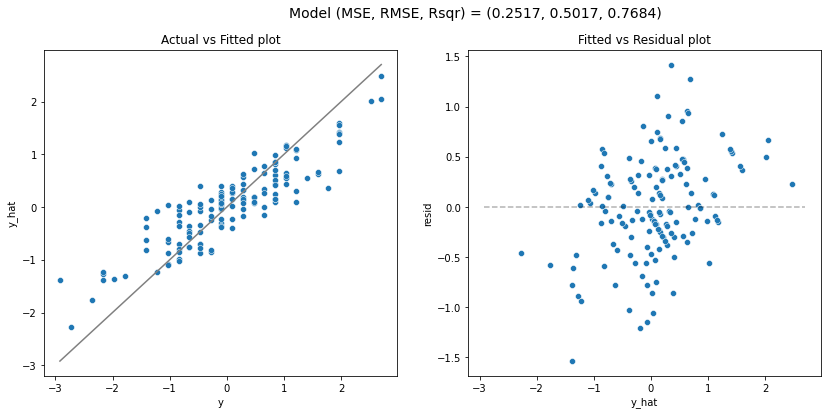

(0.25171867680963783, 0.5017157330696714, 0.7684124341091326)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
poly_model = poly.fit(Xs_train , ys_train)
model_fit(poly_model, Xs_train, ys_train, plot = True)

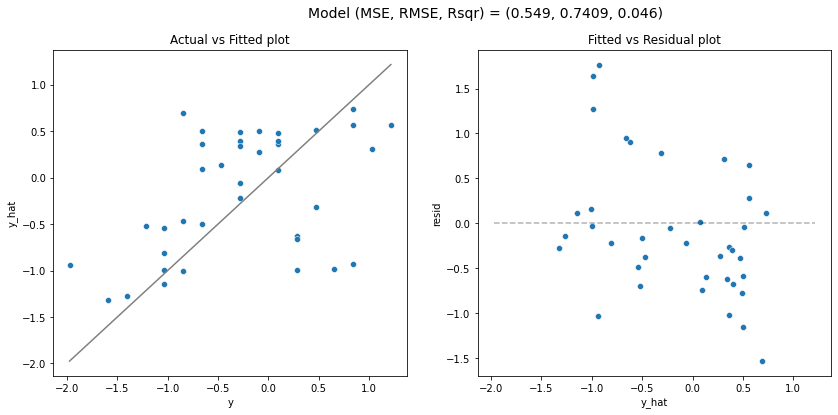

(0.5489815869020624, 0.7409329166004588, 0.045950740411703994)

In [136]:
model_fit(poly_model, Xs_test, ys_test, plot = True)

In [241]:
ms = linear_model.Lasso(alpha = best_lasso1).fit(Xs_train, ys_train)
coef = get_coefs(ms)[1:]

In [242]:
feature = Xs_train.columns

In [243]:
pd.DataFrame(coef, feature)

,0
n_speak_char,0.162270
Angela,0.014946
Dwight,0.000000
Jim,0.040230
Kevin,0.000000
Michael,0.284409
Oscar,-0.000000
Pam,0.000000
Phyllis,0.000000
Ryan,0.000000


In [114]:
alphas = np.logspace(-3, 1, num=200)
betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        
        linear_model.Lasso(alpha = a)
    ).fit(Xs_train, ys_train)

    # Again ignore the intercept since it isn't included in the penalty
    betas.append(get_coefs(m)[1:])  
    rmses.append(model_fit(m, Xs_test, ys_test))

res = pd.DataFrame(
    data = betas,       # Coefficients
    columns = Xs_train.columns, # Coefficient names
).assign(
    alpha = alphas,     # Add alpahs
    rmse = rmses        # Add validation rmses
).melt(
    id_vars = ('alpha', 'rmse') # Move columns into the rows
)

In [117]:
res

,alpha,rmse,variable,value
0,0.001000,"(0.5796614439181667, 0.7613550051836309, -0.00...",n_lines,0.021990
1,0.001047,"(0.5793864902243633, 0.7611744151141466, -0.00...",n_lines,0.022087
2,0.001097,"(0.5790988665692235, 0.7609854575280814, -0.00...",n_lines,0.022188
3,0.001149,"(0.5787980071799401, 0.7607877543572452, -0.00...",n_lines,0.022295
4,0.001203,"(0.5784833225745359, 0.7605809112609493, -0.00...",n_lines,0.022406
...,...,...,...,...
6395,8.309942,"(0.6835304484304126, 0.8267590026303993, -0.18...",neg_score,-0.000000
6396,8.703591,"(0.6835304484304126, 0.8267590026303993, -0.18...",neg_score,-0.000000
6397,9.115888,"(0.6835304484304126, 0.8267590026303993, -0.18...",neg_score,-0.000000
6398,9.547716,"(0.6835304484304126, 0.8267590026303993, -0.18...",neg_score,-0.000000


In [115]:
cv_res = pd.DataFrame(
    data = gs.cv_results_
).filter(
    # Extract the split#_test_score and mean_test_score columns
    regex = '(split[0-9]+|mean)_test_score'
).assign(
    # Add the alphas as a column
    alpha = alphas
)

cv_res.update(
    # Convert negative rmses to positive
    -1 * cv_res.filter(regex = '_test_score')
)

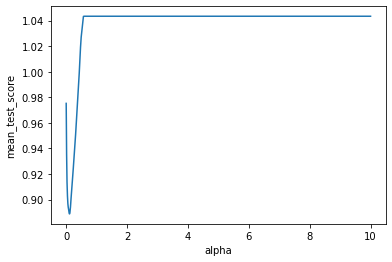

In [116]:
sns.lineplot(x='alpha', y='mean_test_score', data=cv_res)
plt.show()

# 2 Scaled data

##  2.1 Power_transform

In [84]:
num_index = list(range(0,X.shape[1]))
del num_index[20:30]
factor_index = list(range(20,30))

In [21]:
X.iloc[:,factor_index].head()

,Greg Daniels,Jeffrey Blitz,Ken Kwapis,Ken Whittingham,Paul Feig,B.J. Novak,Gene Stupnitsky;Lee Eisenberg,Greg Daniels.1,Michael Schur,Paul Lieberstein
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0


In [85]:
power = PowerTransformer()

trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])
X_train_pow = trans_processing.fit_transform(X_train)

In [16]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 60, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(X_train_pow, y_train)
print(gs.best_params_)

{'ridge__alpha': 60.0}


In [81]:
best_ridge = 60.0

In [18]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(X_train_pow, y_train)
print(gs.best_params_)

{'lasso__alpha': 0.04247571552536898}


In [82]:
best_lasso = 0.04247571552536898

In [86]:
# Description of different models via pipeline
linear_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", LinearRegression())])
knn_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", KNeighborsRegressor(n_neighbors=3))])
lasso_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", linear_model.Lasso(alpha = best_lasso))])
ridge_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", linear_model.Ridge(alpha = best_ridge))])


# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe,
    'KNN': knn_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe}

for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], X_train, y_train, cv = kf, return_train_score = True)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index("model", append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [21]:
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.10,0.01,0.01,0.51
KNN,mean,0.11,0.11,0.09,0.54
Lasso,mean,0.20,0.01,0.23,0.39
Ridge,mean,0.18,0.02,0.21,0.42


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.03,0.00,0.36,0.03
KNN,sd,0.05,0.05,0.16,0.02
Lasso,sd,0.04,0.01,0.06,0.02
Ridge,sd,0.02,0.00,0.11,0.02


In [88]:
m = linear_model.Lasso(alpha = best_lasso).fit(X_train_pow, y_train)
get_coefs(m)[1:]

array([ 0.05696723,  0.03498764,  0.04094859,  0.00874709,  0.00526893,
        0.02676939,  0.        ,  0.18597711,  0.        ,  0.        ,
        0.00889284, -0.        ,  0.01153794,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01133891, -0.        , -0.09302592,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ])

In [94]:
X_train.iloc[:,num_index + factor_index].columns

Index(['n_lines', 'n_directions', 'n_speak_char', 'Angela', 'Dwight', 'Jim',
       'Kevin', 'Michael', 'Oscar', 'Pam', 'Phyllis', 'Ryan', 'Stanley',
       'Kelly', 'Toby', 'Meredith', 'Darryl', 'Creed', 'Andy', 'Erin',
       'pos_score', 'neg_score', 'Greg Daniels', 'Jeffrey Blitz', 'Ken Kwapis',
       'Ken Whittingham', 'Paul Feig', 'B.J. Novak',
       'Gene Stupnitsky;Lee Eisenberg', 'Greg Daniels.1', 'Michael Schur',
       'Paul Lieberstein'],
      dtype='object')

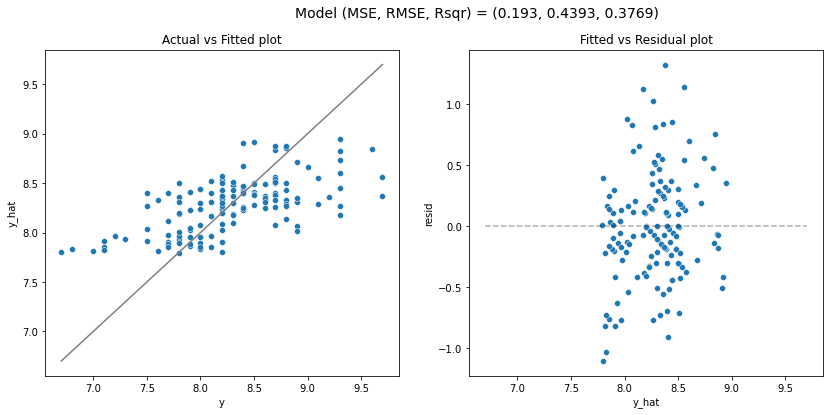

(0.1929523552667786, 0.43926342354762316, 0.37693440492453245)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
lasso_model = lasso_pipe.fit(X_train , y_train)
model_fit(lasso_model, X_train, y_train, plot = True)

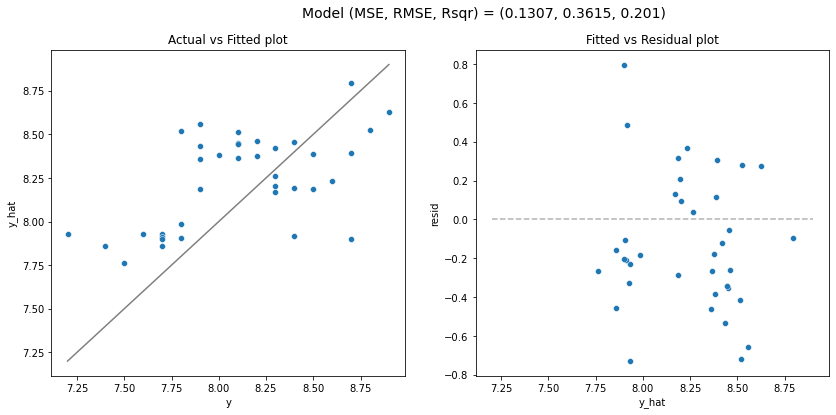

(0.13069800257279188, 0.36152178713431904, 0.20098257529588714)

In [23]:
model_fit(lasso_model, X_test, y_test, plot = True)

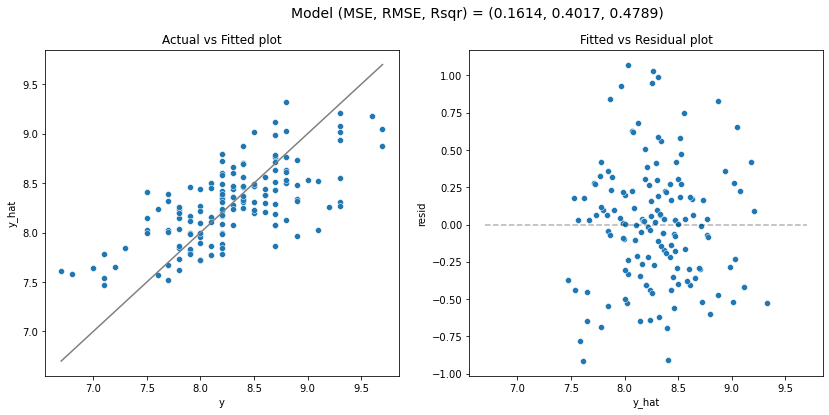

(0.16138846797311746, 0.40173183589692946, 0.4788578678038996)

In [24]:
linear_model = linear_pipe.fit(X_train,y_train)
model_fit(linear_model, X_train, y_train, plot = True)

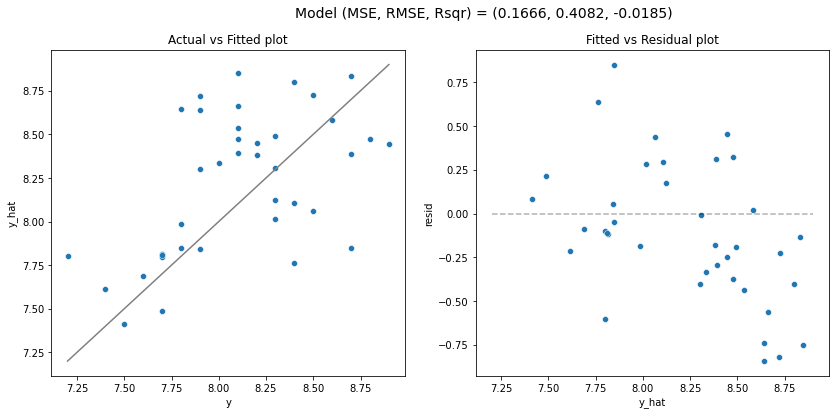

(0.1665981995433543, 0.40816442709201683, -0.018491956564790968)

In [25]:
model_fit(linear_model, X_test, y_test, plot = True)

## 2.3.1 Power_transform with total vote

In [26]:
dff = pd.read_csv("the_office.csv")
Xv = X.copy()
Xv['total_votes'] = dff['total_votes']
Xv_train, Xv_test, y_train, y_test = train_test_split(Xv, y, test_size = 0.2, random_state = 42)

In [27]:
num_index = list(range(0,Xv.shape[1]))
del num_index[20:30]
factor_index = list(range(20,30))
Xv.iloc[:,factor_index].head()

,Greg Daniels,Jeffrey Blitz,Ken Kwapis,Ken Whittingham,Paul Feig,B.J. Novak,Gene Stupnitsky;Lee Eisenberg,Greg Daniels.1,Michael Schur,Paul Lieberstein
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0


In [28]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


In [29]:
Xv_train_pow = trans_processing.fit_transform(Xv_train)

In [32]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 60, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xv_train_pow, y_train)
print(gs.best_params_)

{'ridge__alpha': 11.758793969849245}


In [33]:
best_ridge = 11.758793969849245

In [34]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xv_train_pow, y_train)
print(gs.best_params_)

{'lasso__alpha': 0.04247571552536898}


In [35]:
best_lasso = 0.04247571552536898


In [36]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


# Description of different models via pipeline
linear_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", LinearRegression())])
knn_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", KNeighborsRegressor(n_neighbors=3))])
lasso_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", linear_model.Lasso(alpha = best_lasso))])
ridge_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", linear_model.Ridge(alpha = best_ridge))])

# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe,
    'KNN': knn_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe}

for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], Xv_train, y_train, cv = kf, return_train_score = True)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index("model", append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [37]:
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.16,0.01,0.41,0.71
KNN,mean,0.10,0.12,0.29,0.62
Lasso,mean,0.11,0.01,0.55,0.62
Ridge,mean,0.14,0.01,0.50,0.68


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.02,0.01,0.14,0.02
KNN,sd,0.06,0.03,0.18,0.02
Lasso,sd,0.03,0.01,0.09,0.02
Ridge,sd,0.01,0.01,0.10,0.02


## 2.3.2 Power_transform with vote and episode

In [38]:
Xve = Xv.copy()
Xve['episode'] = dff['episode']
Xve_train, Xve_test, y_train, y_test = train_test_split(Xve, y, test_size = 0.2, random_state = 42)

In [39]:
Xve.head()

,n_lines,n_directions,n_speak_char,Angela,Dwight,Jim,Kevin,Michael,Oscar,Pam,...,Paul Feig,B.J. Novak,Gene Stupnitsky;Lee Eisenberg,Greg Daniels.1,Michael Schur,Paul Lieberstein,pos_score,neg_score,total_votes,episode
0,229,27,15,1.0,29.0,36.0,1.0,81.0,3.0,40.0,...,0,0,0,0,0,0,0.196,0.093,3706,1
1,203,20,12,4.0,17.0,24.0,8.0,75.0,13.0,12.0,...,0,1,0,0,0,0,0.240,0.076,3566,2
2,244,21,13,5.0,62.0,42.0,6.0,56.0,9.0,32.0,...,0,0,0,0,0,1,0.215,0.092,2983,3
3,243,24,14,7.0,47.0,49.0,3.0,68.0,14.0,22.0,...,0,0,0,0,1,0,0.228,0.089,2886,4
4,230,49,18,3.0,25.0,21.0,1.0,104.0,2.0,14.0,...,0,0,0,1,0,0,0.180,0.109,3179,5


In [40]:
num_index = list(range(0,Xve.shape[1]))
del num_index[20:30]
factor_index = list(range(20,30))

In [41]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


In [42]:
Xve_train_pow = trans_processing.fit_transform(Xve_train)

In [43]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 60, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xve_train_pow, y_train)
print(gs.best_params_)

{'ridge__alpha': 11.758793969849245}


In [44]:
best_ridge = 11.758793969849245

In [45]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xve_train_pow, y_train)
print(gs.best_params_)

{'lasso__alpha': 0.036969127071950283}


In [46]:
best_lasso = 0.036969127071950283

In [47]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


# Description of different models via pipeline
linear_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", LinearRegression())])
knn_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", KNeighborsRegressor(n_neighbors=3))])
lasso_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", linear_model.Lasso(alpha = best_lasso))])
ridge_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", linear_model.Ridge(alpha = best_ridge))])

# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe,
    'KNN': knn_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe}

for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], Xve_train, y_train, cv = kf, return_train_score = True)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index("model", append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [48]:
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.17,0.02,0.48,0.75
KNN,mean,0.09,0.12,0.32,0.63
Lasso,mean,0.07,0.00,0.59,0.66
Ridge,mean,0.13,0.01,0.57,0.72


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.02,0.00,0.13,0.03
KNN,sd,0.03,0.04,0.16,0.01
Lasso,sd,0.01,0.01,0.10,0.03
Ridge,sd,0.02,0.01,0.08,0.03


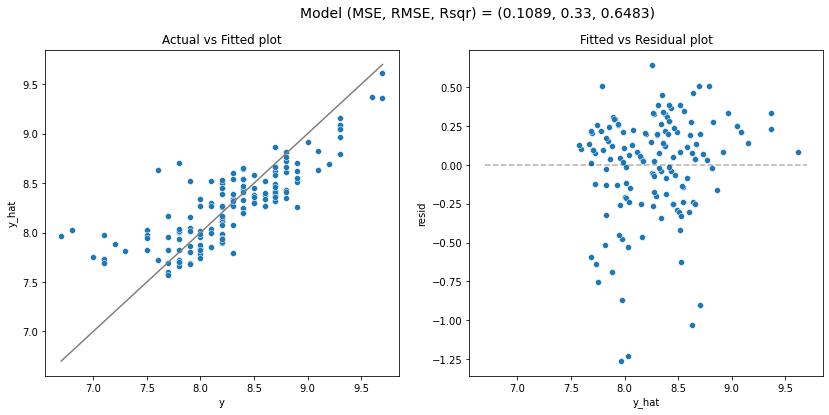

(0.10891295374990541, 0.33001962631017173, 0.6483074060133258)

In [49]:
lasso_model = lasso_pipe.fit(Xve_train , y_train)
model_fit(lasso_model, Xve_train, y_train, plot = True)

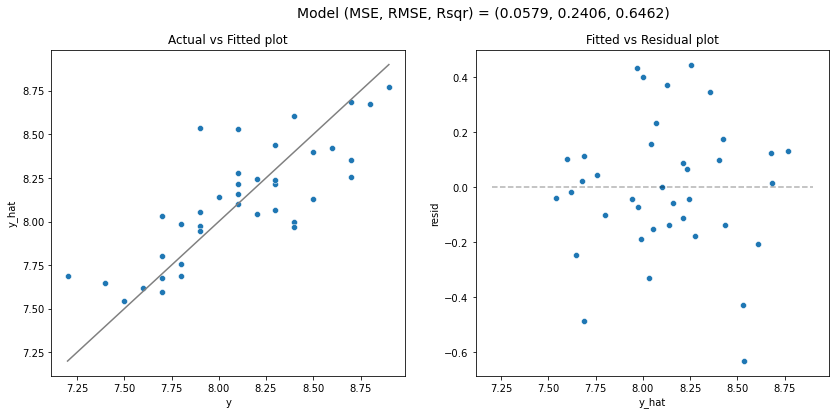

(0.05787869400319981, 0.2405799118862583, 0.646160736068499)

In [50]:
model_fit(lasso_model, Xve_test, y_test, plot = True)

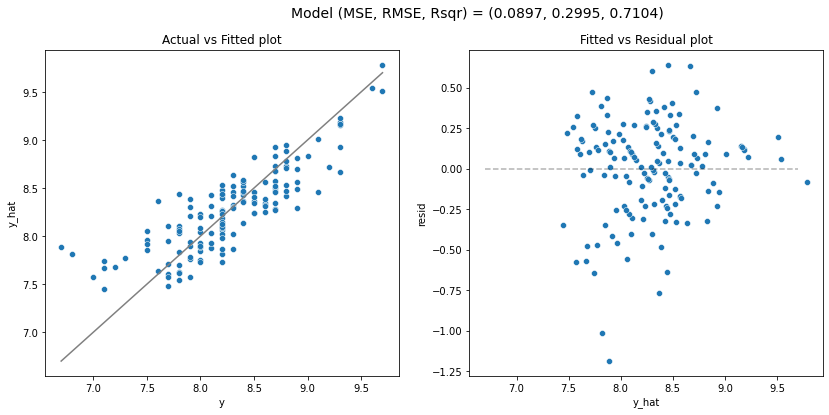

(0.08969016965905939, 0.29948317091125404, 0.7103800114086347)

In [51]:
ridge_model = ridge_pipe.fit(Xve_train , y_train)
model_fit(ridge_model, Xve_train, y_train, plot = True)

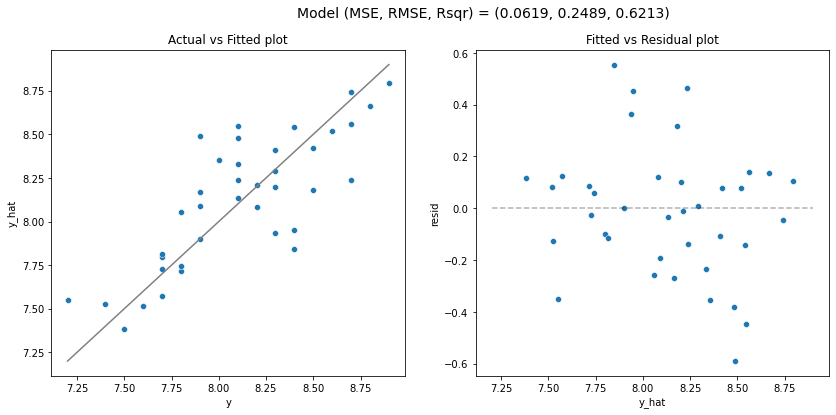

(0.061939665003557416, 0.24887680688155217, 0.6213341394363382)

In [52]:
model_fit(ridge_model, Xve_test, y_test, plot = True)

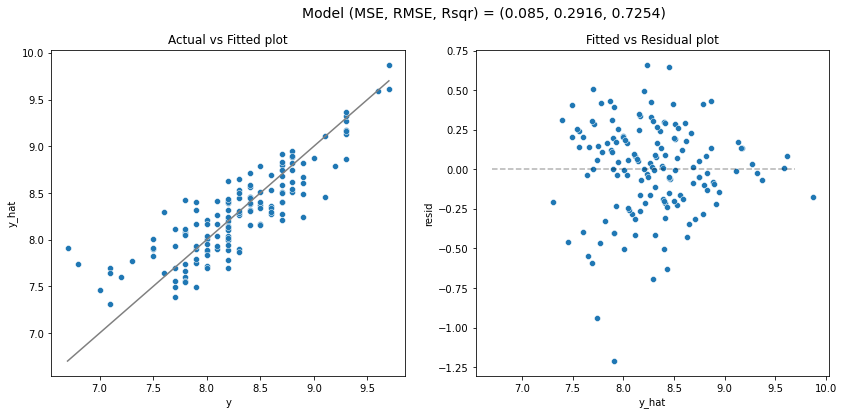

(0.08503273889239922, 0.2916037360741443, 0.7254193970027609)

In [53]:
linear_model = linear_pipe.fit(Xve_train , y_train)
model_fit(linear_model, Xve_train, y_train, plot = True)

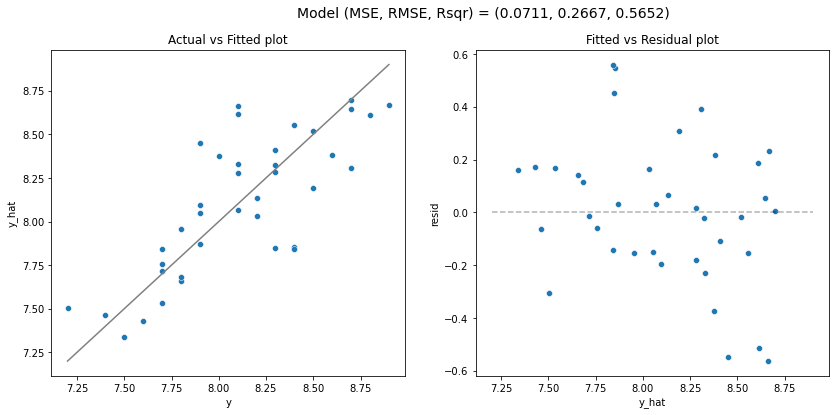

(0.07111902457081708, 0.26668150399084123, 0.5652164628270115)

In [54]:
model_fit(linear_model, Xve_test, y_test, plot = True)

In [57]:
m = linear_model.Lasso(alpha = best_lasso).fit(Xve_train_pow, y_train)
get_coefs(m)

array([ 8.28648649e+00,  1.02539092e-01,  3.66078385e-02,  3.68977367e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.42185596e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  7.75442545e-03,  0.00000000e+00,  0.00000000e+00,
        3.54905530e-03,  0.00000000e+00,  1.70244305e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.67092578e-01,
        7.68651860e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [58]:
mr = linear_model.Ridge(alpha = best_ridge).fit(Xve_train_pow, y_train)
get_coefs(mr)

array([ 8.27603102e+00,  4.42719415e-02,  3.53014448e-02,  3.98719541e-02,
        6.14815548e-03,  3.72219883e-02,  2.95582096e-02, -3.01378927e-02,
        8.65040034e-02,  3.75785174e-02, -1.02699086e-02, -5.56615804e-03,
       -4.55647709e-02,  2.19227702e-02,  3.34083008e-02,  2.20810680e-02,
        2.61569012e-02,  2.80056771e-02,  8.15252966e-03,  3.83033069e-02,
       -1.38875515e-02, -3.06273947e-02, -4.91338540e-02,  3.58170264e-01,
        1.16912290e-01,  5.81056549e-02, -3.67032887e-02, -3.04422985e-02,
       -1.33370587e-02,  2.06669872e-02,  8.20747953e-02,  4.02849074e-02,
        7.29180521e-03, -2.23834027e-02,  3.40894811e-03])

## Dummy

In [59]:
Xex = df.drop(['Unnamed: 0', 'imdb_rating', 'Paul Feig','Ken Kwapis','Greg Daniels','Ken Whittingham','Jeffrey Blitz',
               'Greg Daniels.1','Gene Stupnitsky;Lee Eisenberg','Michael Schur','Paul Lieberstein','B.J. Novak'], axis = 1)
Xex_train, Xex_test, y_train, y_test = train_test_split(Xex, y, test_size = 0.2, random_state = 42)

In [60]:
Xex.head()

,n_lines,n_directions,n_speak_char,Angela,Dwight,Jim,Kevin,Michael,Oscar,Pam,...,Toby,Meredith,Darryl,Creed,Andy,Erin,Other_director,Other_writer,pos_score,neg_score
0,229,27,15,1.0,29.0,36.0,1.0,81.0,3.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.196,0.093
1,203,20,12,4.0,17.0,24.0,8.0,75.0,13.0,12.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0.240,0.076
2,244,21,13,5.0,62.0,42.0,6.0,56.0,9.0,32.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0,0,0.215,0.092
3,243,24,14,7.0,47.0,49.0,3.0,68.0,14.0,22.0,...,4.0,10.0,0.0,0.0,0.0,0.0,1,0,0.228,0.089
4,230,49,18,3.0,25.0,21.0,1.0,104.0,2.0,14.0,...,0.0,0.0,15.0,0.0,0.0,0.0,0,0,0.180,0.109


In [61]:
num_index = list(range(0,Xex.shape[1]))
del num_index[20:22]
factor_index = list(range(20,22))

In [62]:
Xex.iloc[:,factor_index].head()

,Other_director,Other_writer
0,0,1
1,0,0
2,0,0
3,1,0
4,0,0


In [63]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])

In [64]:
Xex_train_pow = trans_processing.fit_transform(Xex_train)

In [65]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 60, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xex_train_pow, y_train)
print(gs.best_params_)

{'ridge__alpha': 57.28643216080401}


In [66]:
best_ridge = 57.28643216080401

In [67]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xex_train_pow, y_train)
print(gs.best_params_)

{'lasso__alpha': 0.02221946860939524}


In [68]:
best_lasso = 0.02221946860939524

In [69]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


# Description of different models via pipeline
linear_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", LinearRegression())])
knn_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", KNeighborsRegressor(n_neighbors=3))])
lasso_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", linear_model.Lasso(alpha = best_lasso))])
ridge_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", linear_model.Ridge(alpha = best_ridge))])

# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe,
    'KNN': knn_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe}

for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], Xex_train, y_train, cv = kf, return_train_score = True)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index("model", append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [70]:
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.16,0.02,0.14,0.48
KNN,mean,0.08,0.08,0.10,0.55
Lasso,mean,0.08,0.01,0.24,0.45
Ridge,mean,0.14,0.02,0.23,0.43


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.02,0.01,0.20,0.02
KNN,sd,0.03,0.01,0.17,0.03
Lasso,sd,0.03,0.01,0.09,0.02
Ridge,sd,0.02,0.00,0.10,0.02


# Dummy with votes and episode

In [71]:
Xexa = Xex.copy()
Xexa['episode'] = dff['episode']
Xexa['total_votes'] = dff['total_votes']
Xexa_train, Xexa_test, y_train, y_test = train_test_split(Xexa, y, test_size = 0.2, random_state = 42)

In [72]:
num_index = list(range(0,Xexa.shape[1]))
del num_index[20:22]
factor_index = list(range(20,22))

In [73]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])

In [74]:
Xexa_train_pow = trans_processing.fit_transform(Xexa_train)

In [75]:
# find Ridge's optimal alpha
alphas = np.linspace(0, 60, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Ridge()),
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xexa_train_pow, y_train)
print(gs.best_params_)

{'ridge__alpha': 11.457286432160803}


In [76]:
best_ridge = 11.457286432160803

In [77]:
# find lasso's optimal alpha
alphas = np.logspace(-3, 1, num=200)
gs = GridSearchCV(
    make_pipeline(
    linear_model.Lasso()),
    param_grid = {'lasso__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42),
    scoring = "neg_root_mean_squared_error"
)

gs.fit(Xexa_train_pow, y_train)
print(gs.best_params_)

{'lasso__alpha': 0.036969127071950283}


In [78]:
best_lasso = 0.036969127071950283

In [79]:
trans_processing = ColumnTransformer([
    ("power_transformer", power, num_index),
    ('factor', 'passthrough', factor_index)
])


# Description of different models via pipeline
linear_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", LinearRegression())])
knn_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", KNeighborsRegressor(n_neighbors=3))])
lasso_pipe = Pipeline(steps = [("trans_processing", trans_processing),("model", linear_model.Lasso(alpha = best_lasso))])
ridge_pipe = Pipeline(steps = [("trans_processing", trans_processing), ("model", linear_model.Ridge(alpha = best_ridge))])

# Collection of all models
model_dict = {
    'LinearRegression': linear_pipe,
    'KNN': knn_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe}

for i, model_name in enumerate(model_dict): 
    scores = cross_validate(model_dict[model_name], Xexa_train, y_train, cv = kf, return_train_score = True)
    scores_df = tidy_scores(scores)
    scores_df['model'] = model_name
    scores_df = scores_df.set_index("model", append=True)
    scores_df = scores_df.swaplevel()
    
    if i == 0:
        all_scores = scores_df
    else:
        all_scores = pd.concat([all_scores, scores_df], axis=0)

In [80]:
# Mean values for the train and valid scores        
display(all_scores.xs('mean', level=1, drop_level=False))
# Std Dev. values for the train and valid scores
display(all_scores.xs('sd', level=1, drop_level=False))

,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,mean,0.16,0.02,0.55,0.73
KNN,mean,0.13,0.15,0.32,0.63
Lasso,mean,0.07,0.02,0.59,0.66
Ridge,mean,0.10,0.01,0.57,0.71


,,fit_time,score_time,val_score,train_score
model,fold,,,,
LinearRegression,sd,0.01,0.01,0.08,0.03
KNN,sd,0.03,0.03,0.15,0.01
Lasso,sd,0.01,0.00,0.10,0.03
Ridge,sd,0.03,0.01,0.07,0.03
